## Compare SSE and perceptron classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression

np.random.seed(42)

### Section1: Solve Regression Problem with linear regression cost function and see the results

#### Part1, Generating synthetic data:

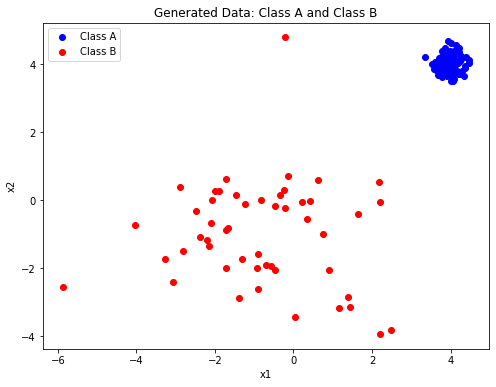

In [2]:
#in summary, this code generates a 2D array of 100 random points
#in 2D space, where each point is normally distributed around the
# mean (4, 4) with a standard deviation of 0.25.
class_A = np.random.normal(loc=(4,4), scale=0.25, size=(100,2))
#This code creates a 1D array of ones with the same number of
#elements as the number of rows in the class_A array.
label_A = np.ones(class_A.shape[0])

class_B = np.random.normal(loc=(-1, -1), scale=1.5, size=(50,2))
label_B = np.zeros(class_B.shape[0])

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.title("Generated Data: Class A and Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

#### using SSE cost function from linear regression for an linear classification problem:

##### My Own Code:

In [5]:
X = np.vstack((class_A, dataset_B))
y = np.hstack((label_A, label_B))
print(X.shape)
print(y.shape)

def regression_closed_form(X, y):
    #Adding Bias:
    X_with_bias = np.c_[np.ones((len(X), 1)), X]
    #(x^T x)^-1 * y^T * X 
    w = np.dot(inv(np.dot(X_with_bias.transpose(), X_with_bias)), np.dot(y.T, X_with_bias ) ) 
    return w

def print_parameter_vectors(w):
    for i in range(len(w)):
        print(f"w{i} = {w[i]}")

def hypotheses_vector(w, X):
    h = w[0] + w[1] * X[: , 0] + w[2] * X[: , 1]
    return h

#Get parameter vector w
w = regression_closed_form(X, y)
print_parameter_vectors(w)

h = hypotheses_vector(w, X)
print(h.shape)


NameError: name 'dataset_B' is not defined

##### Using SkLearn:

In [8]:
model = LinearRegression()
model.fit(X, y)

w1, w2 = model.coef_  # weights
w0 = model.intercept_  # bias

print(f"Model weights: w1 = {w1:.2f}, w2 = {w2:.2f}, bias = {w0:.2f}")


NameError: name 'X' is not defined

##### Plot the fitted line:

###### My Own Code:

In [9]:
x_vals = np.linspace(-4, 6, 100)
x_vals_2d = np.column_stack((x_vals, x_vals))

print(x_vals.shape)
decision_boundary = hypotheses_vector(w, x_vals_2d)

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(dataset_B[:, 0], dataset_B[:, 1], label='Class B', color='red')
plt.plot(x_vals_2d, decision_boundary, label='Decision Boundary (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

(100,)


NameError: name 'hypotheses_vector' is not defined

###### Masters Code:

In [10]:
# Plot the decision boundary: w1 * x1 + w2 * x2 + b = 0.5
x_vals = np.linspace(-4, 6, 100)
decision_boundary = (-w1 * x_vals - w0 + 0.5) / w2

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.plot(x_vals, decision_boundary, label='Decision Boundary (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


NameError: name 'w1' is not defined

### Section3, Implementing a Perceptron Neural Network:



In [31]:
from random import sample


class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs      = n_epochs
        self.weights       = None
        self.bias          = None
        self.errors_       = []
    
    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        """
        Train the Perceptron model on the provided data.

        Parameters:
        X : array-like, shape = [n_samples, n_features]
            Training vectors.
        y : array-like, shape = [n_samples]
            Target values. Must be +1 or -1.
        """
        n_samples, n_features = X.shape

        #Starting weights and bias with zero:
        self.weights = np.zeros(n_features)
        self.bias    = 0.0

        for epoch in range(self.n_epochs):
            errors = 0 
            for i in range(n_samples):
                linear_output = np.dot(self.weights, X[i]) + self.bias # w^T x + b
                y_predicted   = self._unit_step(linear_output)
                #Misclassified:
                if y_predicted != y[i]:
                    update        = self.learning_rate * y[i]
                    self.weights += update * X[i]
                    self.bias    += update
                    errors       += 1

            self.errors_.append(errors)

            # if no errors, convergence achieved
            if errors == 0:
                print(f"Converged after {epoch+1} epochs")
                break
    
    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        X : array-like, shape = [n_samples, n_features]

        Returns:
        array, shape = [n_samples]
            Predicted class labels.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)
         

In [32]:
X_ab = np.vstack((class_A, class_B))
y_ab = np.hstack( ( np.ones(class_A.shape[0]), -np.ones(class_B.shape[0]) ) )

shuffle_idx = np.random.permutation(len(X_ab))
X_AB_linear_sep_linear_sep_linear_sep, y_ab = X_ab[shuffle_idx], y_ab[shuffle_idx]

print("Combined Data Sample Points:\n", X_ab[:5])
print("Combined Labels:\n", y_ab[:5])


Combined Data Sample Points:
 [[4.12417854 3.96543392]
 [4.16192213 4.38075746]
 [3.94146166 3.94146576]
 [4.3948032  4.19185868]
 [3.8826314  4.13564001]]
Combined Labels:
 [-1.  1. -1. -1. -1.]


In [33]:
perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)
perceptron.fit(X_ab, y_ab)

print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")


Final Weights: [ 0.01068536 -0.01224836]
Final Bias: -0.010000000000000004


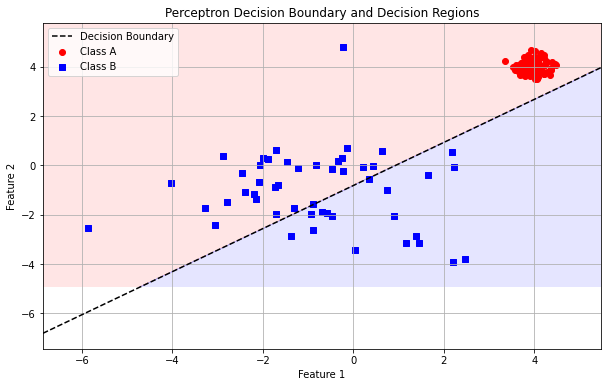

In [34]:
from matplotlib.colors import ListedColormap

x_min, x_max = X_ab[:, 0].min() - 1, X_ab[:, 0].max() + 1
y_min, y_max = X_ab[:, 1].min() - 1, X_ab[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -perceptron.bias / perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

plt.scatter(class_A[:, 0], class_A[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], color='blue', marker='s', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()
     


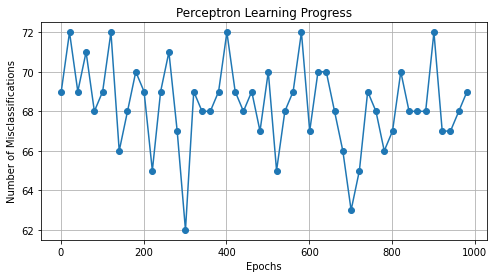

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(perceptron.errors_) + 1, 20), perceptron.errors_[::20], marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()


### Part A: Linearly Separable Data


In [36]:
def generate_ab_class(n_points=100):
    dataset_A = []
    dataset_B = []
    while len(dataset_A) < n_points or len(dataset_B) < n_points:
        x = np.random.uniform(0, 10)
        y = np.random.uniform(0, 10)
        if y > x and len(dataset_A) < n_points:
            dataset_A.append([x, y])
        elif y < x and len(dataset_B) < n_points:
            dataset_B.append([x, y])
    return np.array(dataset_A), np.array(dataset_B)

class_A_LS, class_B_LS = generate_ab_class()

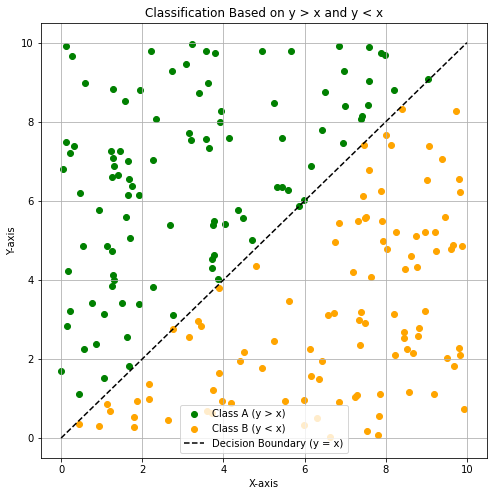

In [37]:
plt.figure(figsize=(8, 8))
plt.scatter(class_A_LS[:, 0], class_A_LS[:, 1], color='green', label='Class A (y > x)')
plt.scatter(class_B_LS[:, 0], class_B_LS[:, 1], color='orange', label='Class B (y < x)')
plt.plot([0, 10], [0, 10], color='black', linestyle='--', label='Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Classification Based on y > x and y < x')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
#X_ab: combined feature data from class A and class B

X_AB_linear_sep = np.vstack((class_A_LS, class_B_LS))
y_AB_linear_sep = np.hstack( ( np.ones(class_A_LS.shape[0]), -np.ones(class_B_LS.shape[0]) ) )

shuffle_idx = np.random.permutation(len(X_AB_linear_sep))
X_AB_linear_sep, y_AB_linear_sep = X_AB_linear_sep[shuffle_idx], y_AB_linear_sep[shuffle_idx]

print("Combined Data Sample Points:\n", X_ab[:5])
print("Combined Labels:\n", y_ab[:5])


Combined Data Sample Points:
 [[4.12417854 3.96543392]
 [4.16192213 4.38075746]
 [3.94146166 3.94146576]
 [4.3948032  4.19185868]
 [3.8826314  4.13564001]]
Combined Labels:
 [-1.  1. -1. -1. -1.]


In [39]:
ls_perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)
ls_perceptron.fit(X_AB_linear_sep, y_AB_linear_sep)

print(f"Final Weights: {ls_perceptron.weights}")
print(f"Final Bias: {ls_perceptron.bias}")


Converged after 10 epochs
Final Weights: [-0.4540759   0.45777672]
Final Bias: -0.019999999999999997


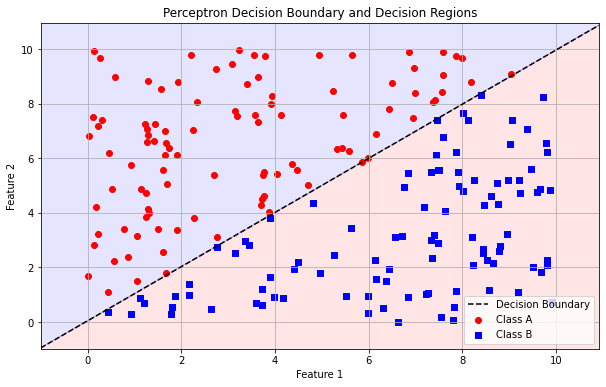

In [42]:
from matplotlib.colors import ListedColormap

x_min, x_max = X_AB_linear_sep[:, 0].min() - 1, X_AB_linear_sep[:, 0].max() + 1
y_min, y_max = X_AB_linear_sep[:, 1].min() - 1, X_AB_linear_sep[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = ls_perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if ls_perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(ls_perceptron.weights[0] * x_vals + ls_perceptron.bias) / ls_perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -ls_perceptron.bias / ls_perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

plt.scatter(class_A_LS[:, 0], class_A_LS[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B_LS[:, 0], class_B_LS[:, 1], color='blue', marker='s', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()
     


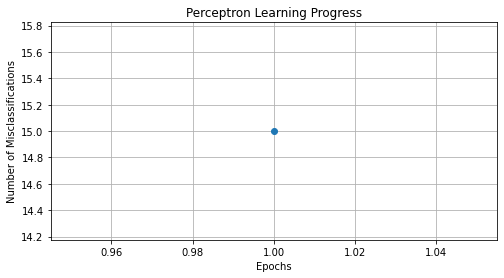

In [43]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(ls_perceptron.errors_) + 1, 20), ls_perceptron.errors_[::20], marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()